In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set plot style for better visualization
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')  # example
%matplotlib inline

In [3]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Tejas\OneDrive\Desktop\weather_prediction_project\data\raw\Project 1 - Weather Dataset.csv")

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(data.head())


First 5 rows of the dataset:


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
# Display dataset info
print("Dataset Info:")
data.info()

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Display basic statistics for numerical columns
print("\nBasic Statistics:")
display(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB

Missing Values:
Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

Basic Statistics:


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


Unique Weather Conditions and Counts:
Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                     

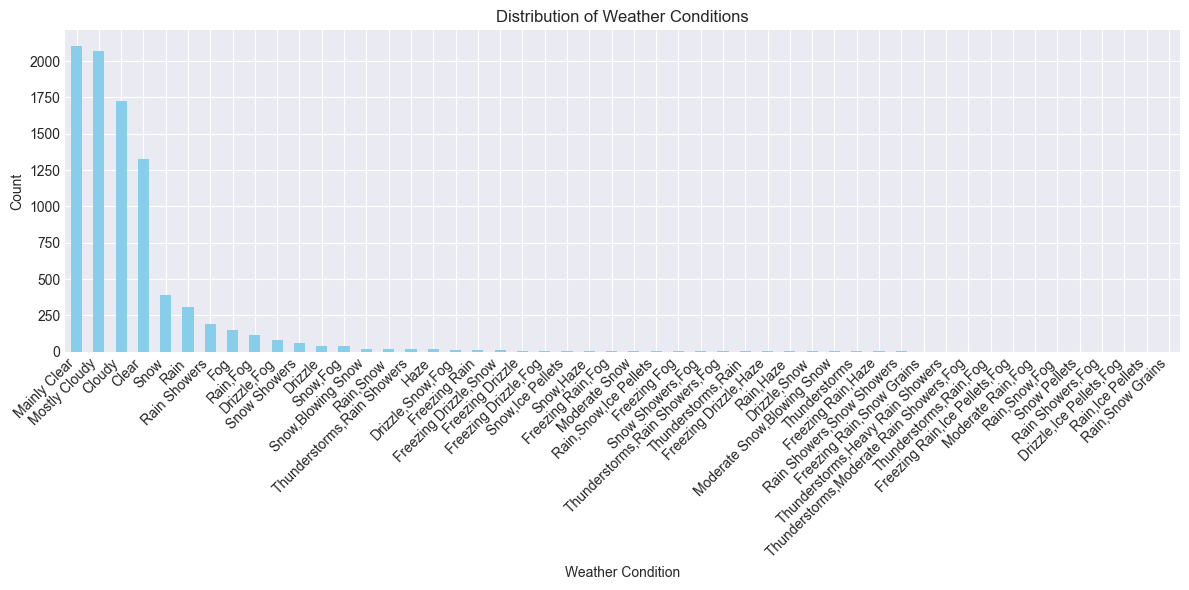

In [5]:
# Count unique weather conditions
print("Unique Weather Conditions and Counts:")
print(data['Weather'].value_counts())

# Plot distribution of weather conditions
plt.figure(figsize=(12, 6))
data['Weather'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

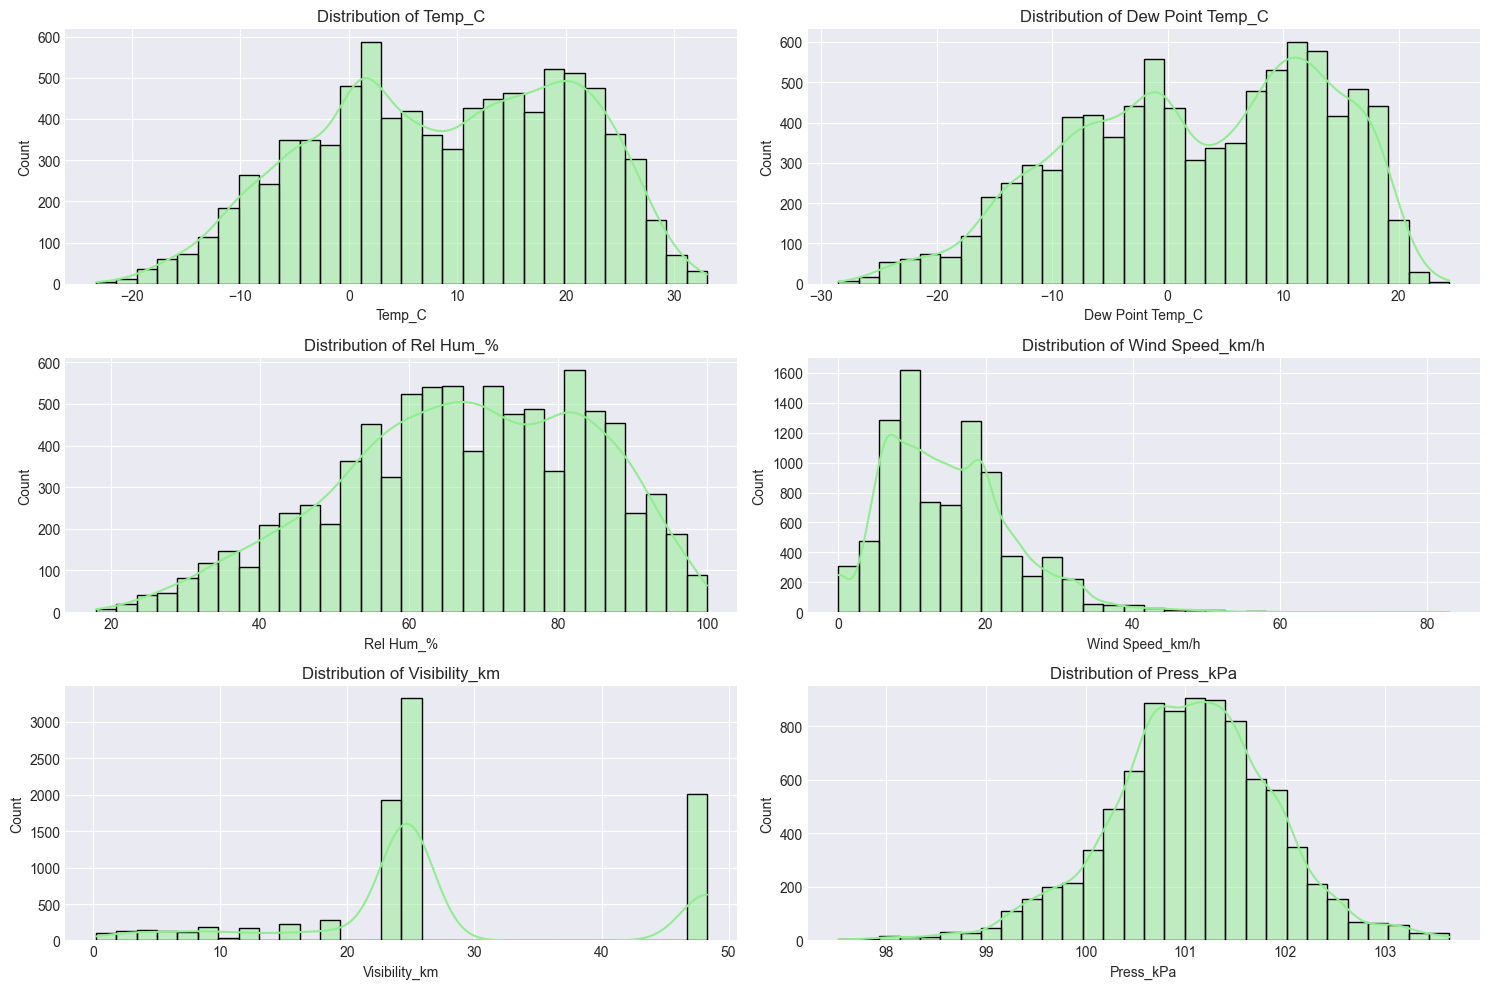

In [6]:
# List of numerical columns
numerical_cols = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

# Plot histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], bins=30, kde=True, color='lightgreen')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

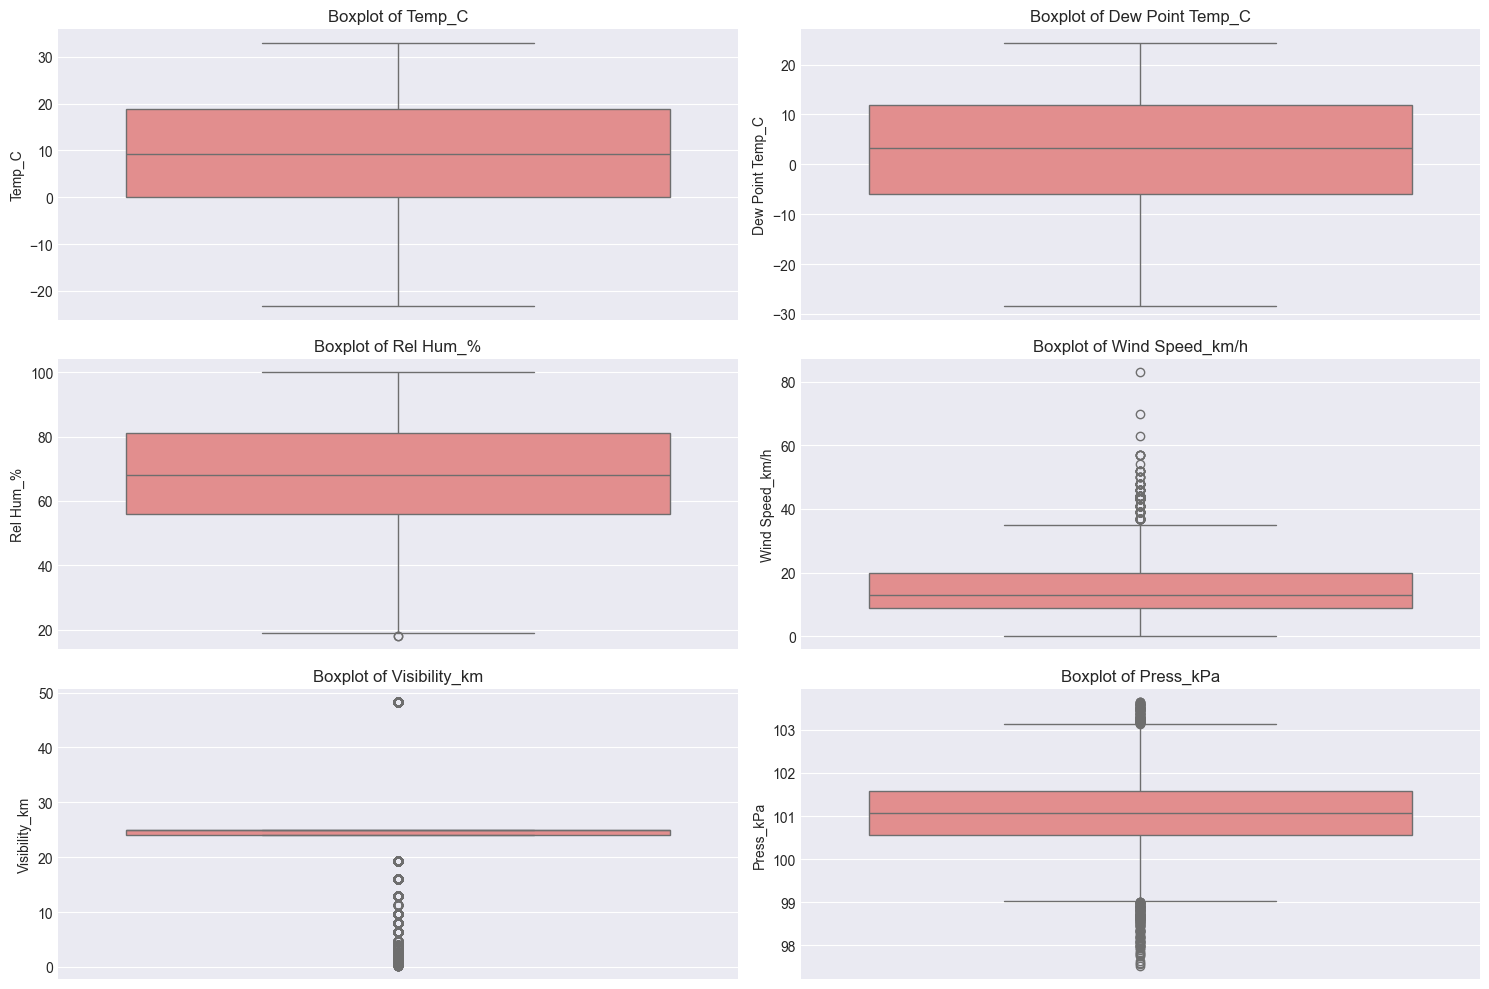

In [7]:
# Plot boxplots to check for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=data[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

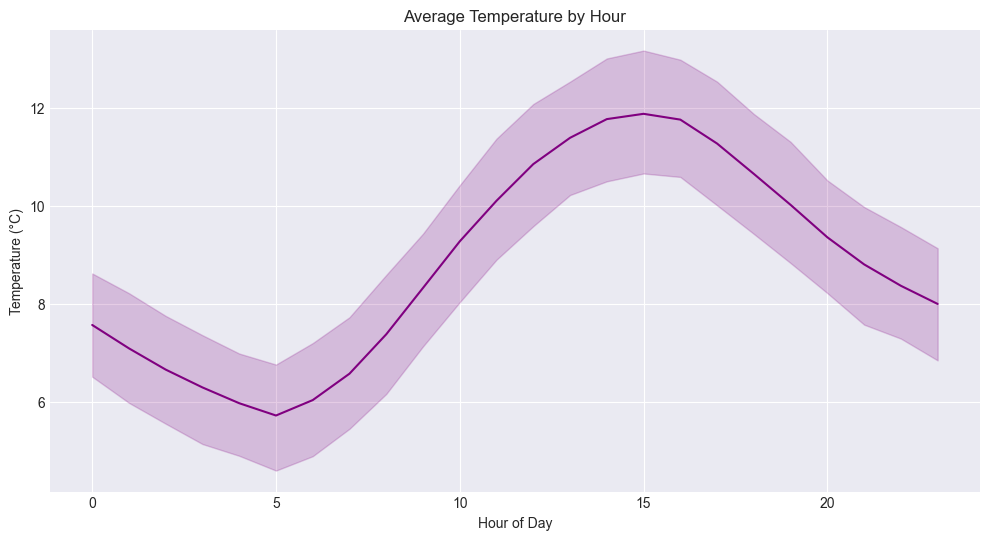

In [8]:
# Convert Date/Time to datetime
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Extract hour, day, and month
data['Hour'] = data['Date/Time'].dt.hour
data['Day'] = data['Date/Time'].dt.day
data['Month'] = data['Date/Time'].dt.month

# Plot average temperature by hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Temp_C', data=data, estimator='mean', color='purple')
plt.title('Average Temperature by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

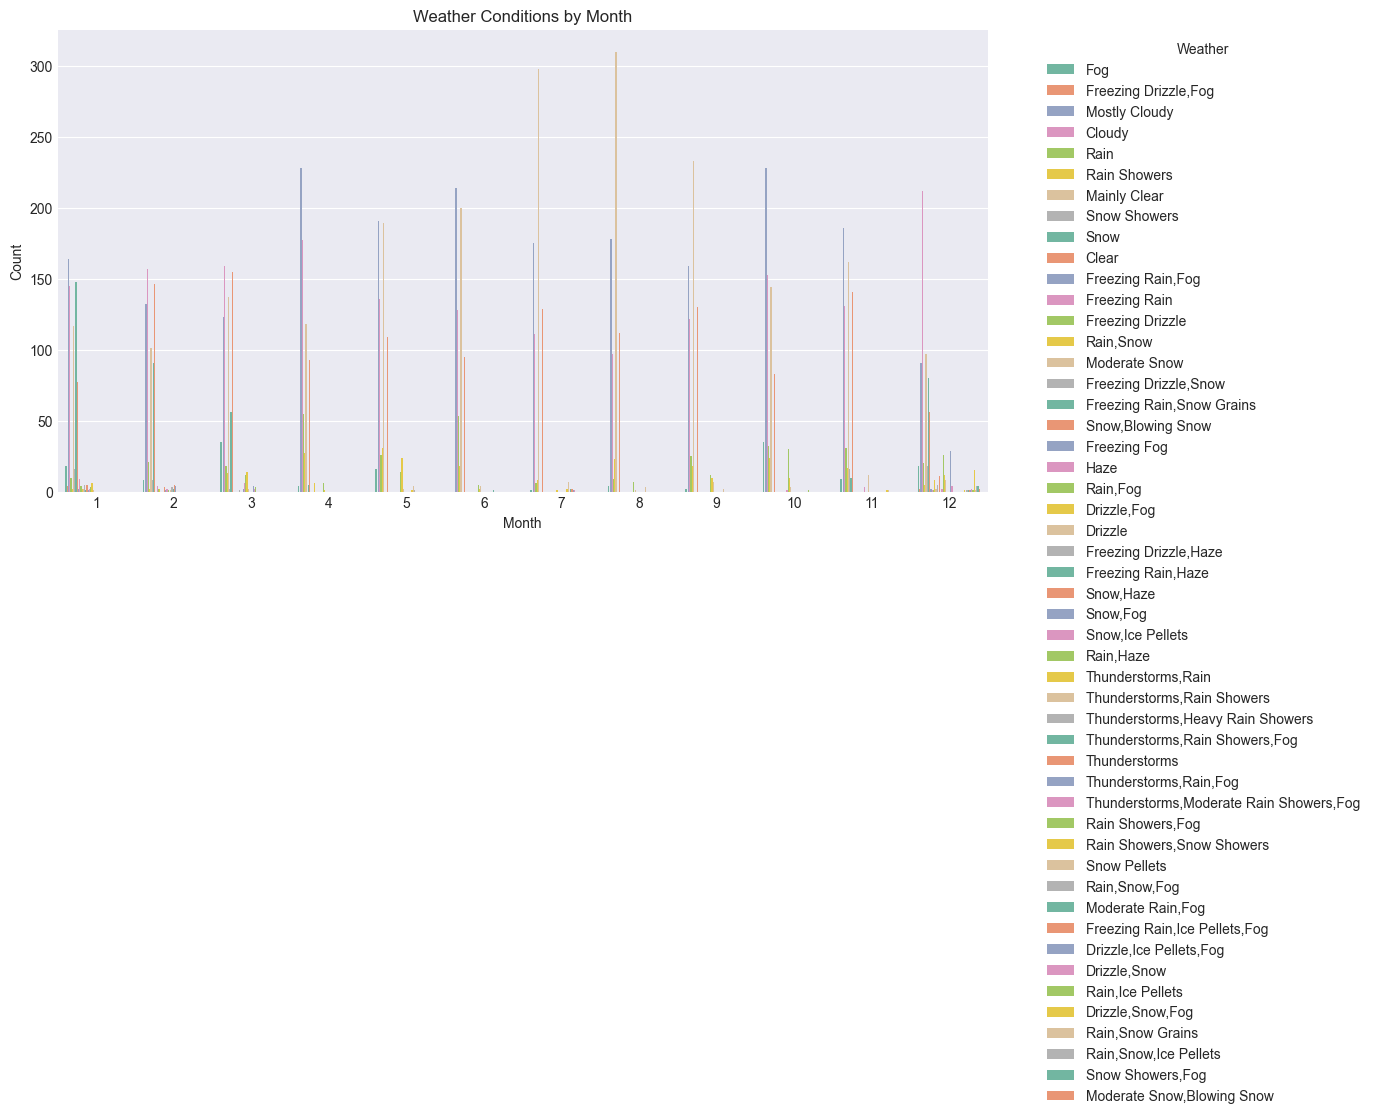

In [9]:
# Plot weather conditions by month
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Weather', data=data, palette='Set2')
plt.title('Weather Conditions by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Weather', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

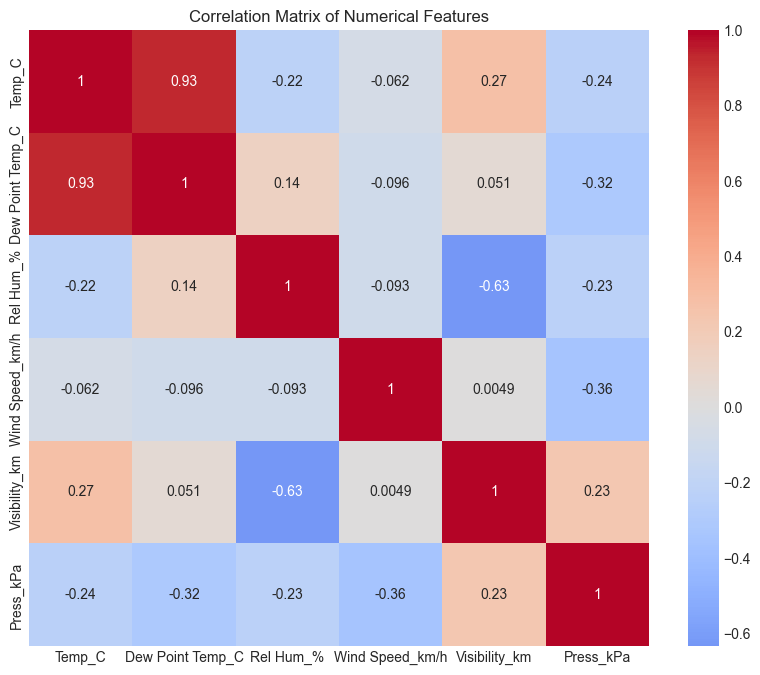

In [10]:
# Compute correlation matrix for numerical features
numerical_cols = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
corr_matrix = data[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

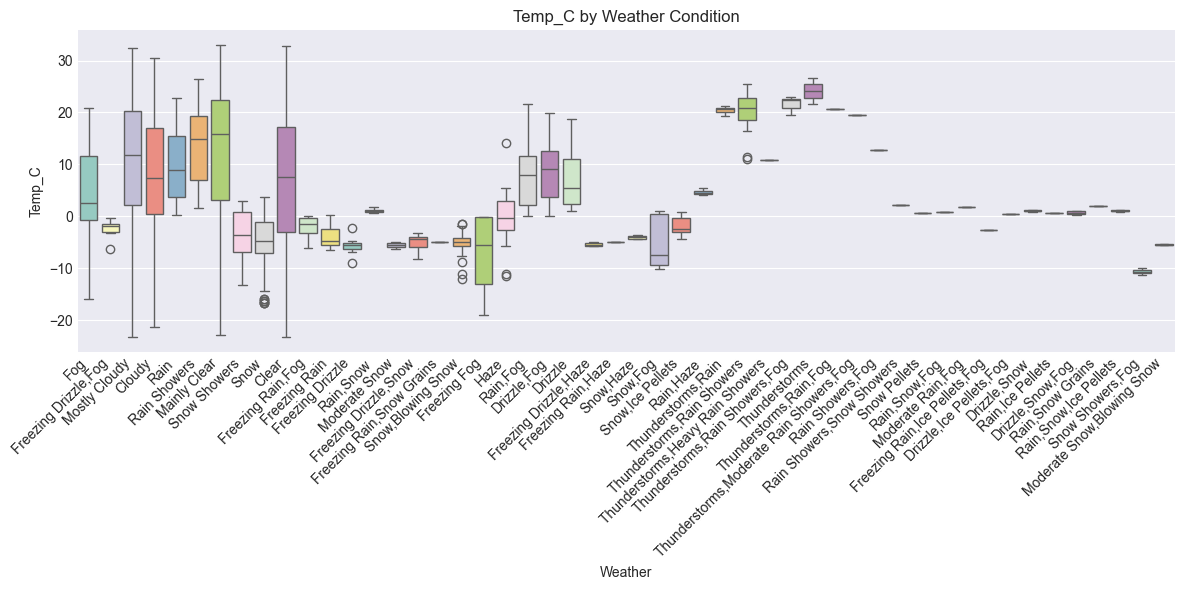

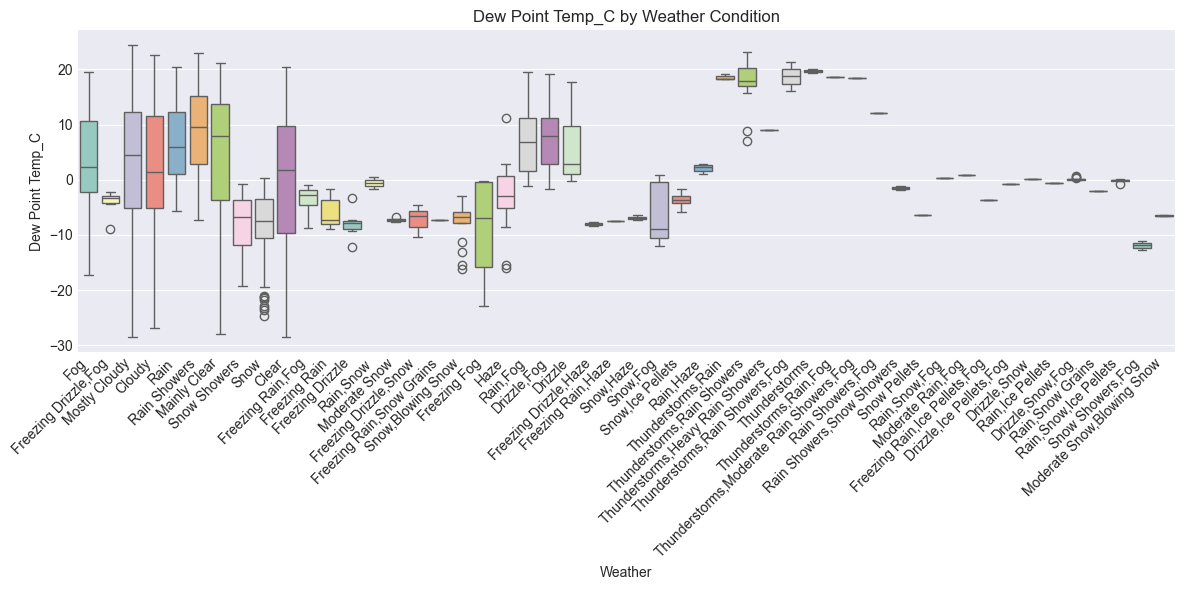

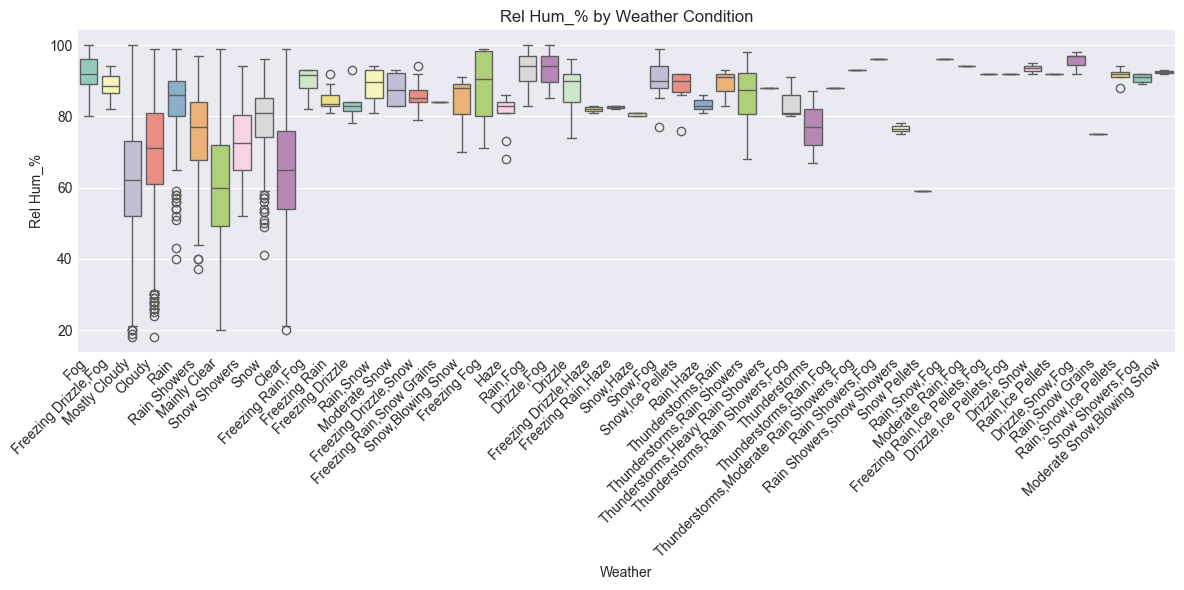

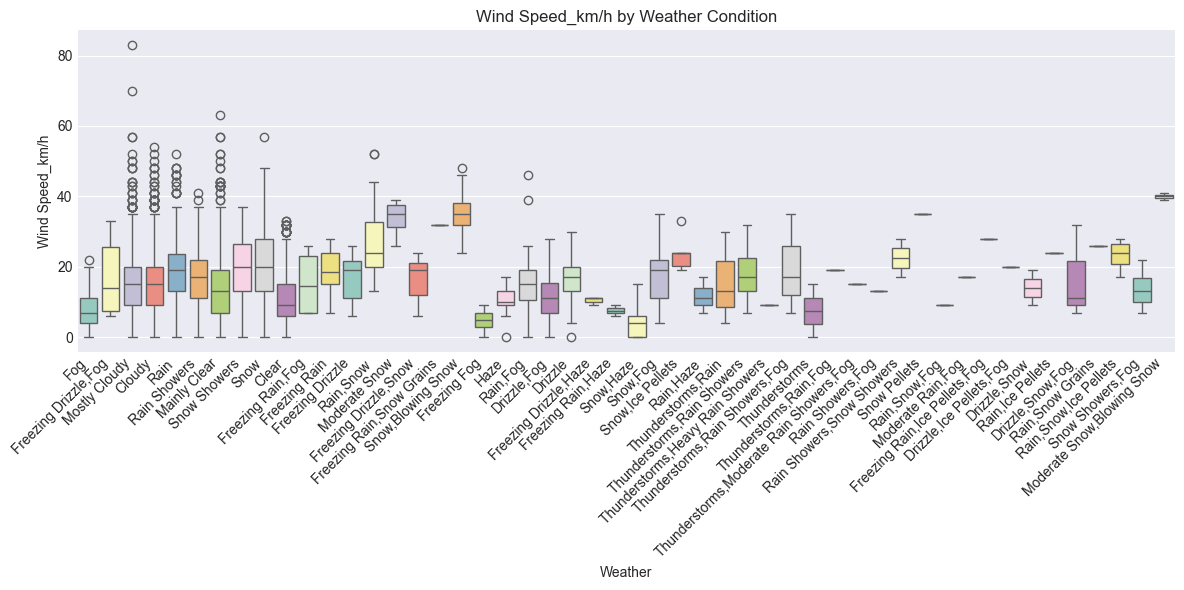

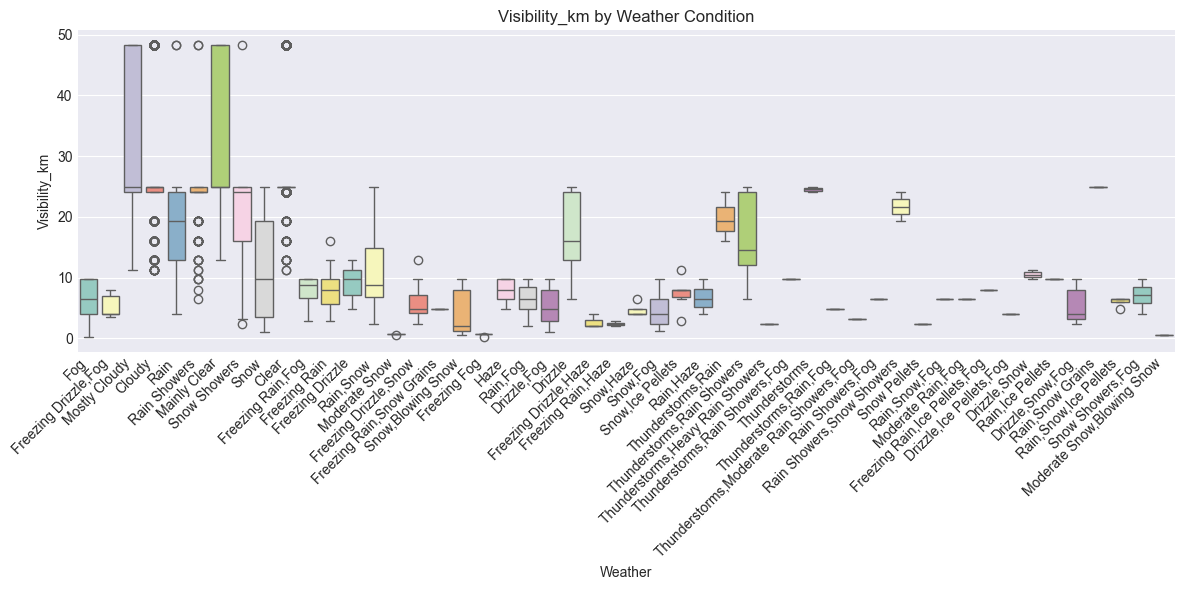

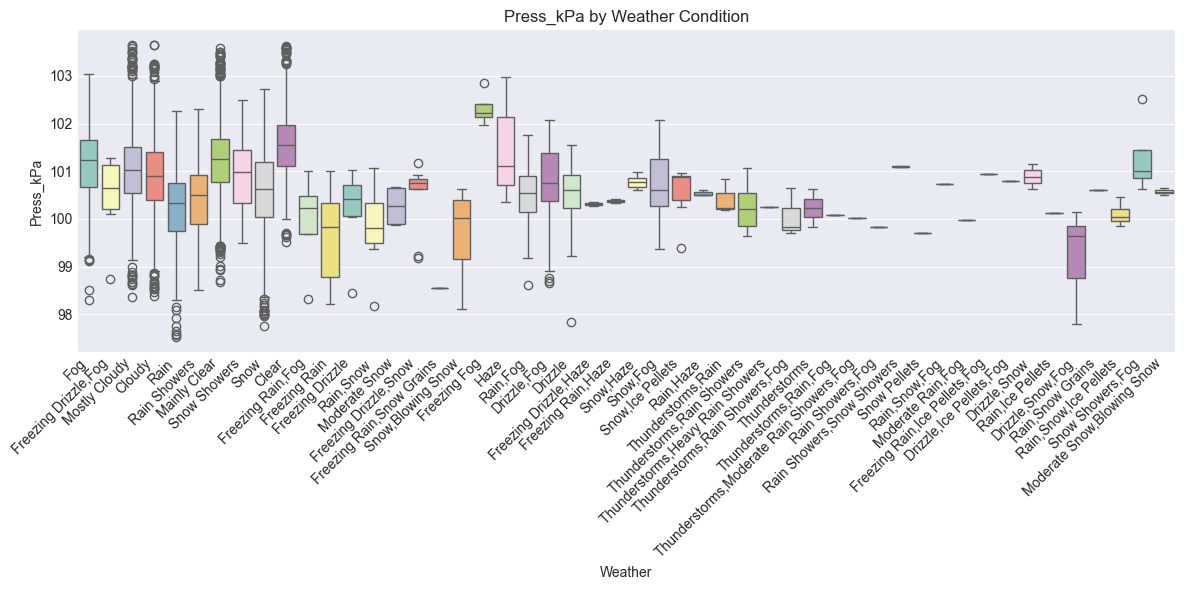

In [11]:
# Plot numerical features by weather condition
numerical_cols = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Weather', y=col, data=data, palette='Set3')
    plt.title(f'{col} by Weather Condition')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()